/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.3907
Epoch 2/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.2089
Epoch 3/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.1349
Epoch 4/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - loss: 0.1013
Epoch 5/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - loss: 0.0698
Epoch 6/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0488
Epoch 7/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0385
Epoch 8/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0360
Epoch 9/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 4s 67ms/step - loss: 0.0320
Epoch 10/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 0.0286
Epoch 11/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0277
Epoch 12/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0208
Epoch 13/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0211
Epoch 14/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - loss: 0.0199
Epoch 15/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 4s 65ms/step - lo

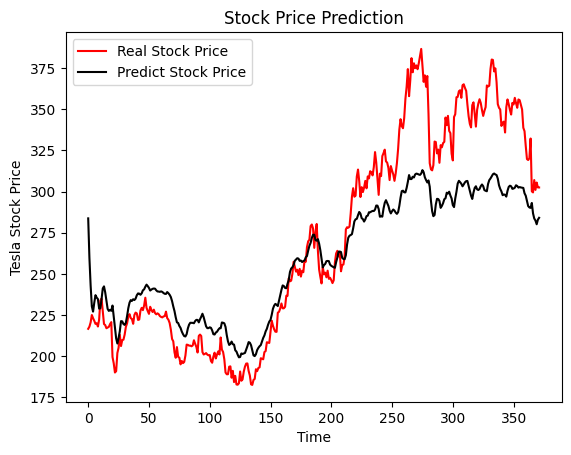

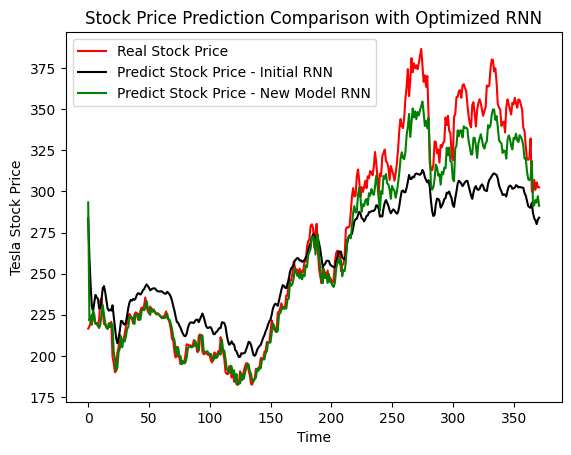

In [2]:
import numpy as np #배열연산, 선형대수학, 과학계산
import pandas as pd #데이터프레임
import matplotlib.pyplot as plt #시각화
from tensorflow import keras #딥러닝

# data load
data = pd.read_csv("tsla.us.txt") #CSV파일 읽어서 데이터프레임 객체 data에 저장
training_size = int(len(data)*0.80) #데이터 전체 길이의 80%를 train 데이터크기로 설정
data_len = len(data) #len(data)는 data의 행의 수를 나타냄

# training data/test data split
train, test = data[0:training_size],data[training_size:data_len] #데이터프레임 처음부터 training_size번째 행까지, 데이터프레임 training_size부터 끝까지

# the part of data that we will use as training.
train = train.loc[:, ["Open"]].values #훈련데이터프레임 train에서 Open열만 선택하여 train에 저장

# data normalization (데이터 정규화)
from sklearn.preprocessing import MinMaxScaler #MinMaxScaler는 데이터를 0~1사이의 값으로 정규화하는데 사용함
scaler = MinMaxScaler(feature_range=(0, 1)) #객체생성 , 데이터를 0~1사이의 범위로 스케일링함
train_scaled = scaler.fit_transform(train) #데이터에 대해 MinMaxScaler를 적용하여 스케일링
#fit_transform에서는 데이터의 최소값과 최대값을 학습하고 데이터를 스케일링

# time-step data generation (시간단계별 데이터 생성)
end_len = len(train_scaled) #스케일링된 train데이터의 길이를 end_len에 저장
X_train = [] #훈련 데이터의 입력 시퀀스를 저장할 빈 리스트 생성
y_train = [] #훈련 데이터의 출력 값을 저장할 빈 리스트 생성
timesteps = 40 #시퀀스 길이를 40으로 설정. 과거 40개의 데이터 포인트를 사용하여 다음 시점의 값을 예측하는 것

for i in range(timesteps, end_len):
    X_train.append(train_scaled[i - timesteps:i, 0]) #현재 시점 i에서 과거 timesteps 개의 데이터를 추출하여 X_train 리스트에 추가
    y_train.append(train_scaled[i, 0]) #현재 시점 i의 데이터를 y_train 리스트에 추가
X_train, y_train = np.array(X_train), np.array(y_train) #리스트 형태의 X_train과 y_train을 NumPy 배열로 변환
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1)) #X_train을 3차원 텐서로 변형. 이는 RNN 모델의 입력 형식에 맞추기 위한 것임
                    # 샘플수, 시퀸스길이, 입력특성의 수





### model1 ###
# 모델 구성
model = keras.Sequential()

# 첫 번째 RNN 레이어
model.add(keras.layers.SimpleRNN(units=50, activation='tanh', return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(keras.layers.Dropout(0.2))

# 두 번째 RNN 레이어
model.add(keras.layers.SimpleRNN(units=50, activation='tanh', return_sequences=True))
model.add(keras.layers.Dropout(0.2))

# 세 번째 RNN 레이어
model.add(keras.layers.SimpleRNN(units=50, activation='tanh', return_sequences=True))
model.add(keras.layers.Dropout(0.2))

# 네 번째 RNN 레이어
model.add(keras.layers.SimpleRNN(units=50, activation='tanh', return_sequences=False))
model.add(keras.layers.Dropout(0.2))

# 출력 레이어
model.add(keras.layers.Dense(units=1))


# 모델 컴파일
model.compile(optimizer='adam', loss='mse')

# 모델 학습
model.fit(X_train, y_train, epochs=100, batch_size=32)
### model1 ###



### model2 ###
model2 = keras.Sequential()

# 첫 번째 RNN 레이어
model2.add(keras.layers.SimpleRNN(units=180, activation='tanh', return_sequences=True, input_shape=(X_train.shape[1], 1)))
model2.add(keras.layers.Dropout(0.25))

# 두 번째 RNN 레이어
model2.add(keras.layers.SimpleRNN(units=180, activation='tanh', return_sequences=True))
model2.add(keras.layers.Dropout(0.25))

# 세 번째 RNN 레이어
model2.add(keras.layers.SimpleRNN(units=180, activation='tanh'))
model2.add(keras.layers.Dropout(0.25))

# 출력 레이어
model2.add(keras.layers.Dense(units=1))

# 모델 컴파일 - Nadam 옵티마이저 사용
nadam = keras.optimizers.Nadam(learning_rate=0.0003)
model2.compile(optimizer=nadam, loss='mse')

# 모델 학습
model2.fit(X_train, y_train, epochs=180, batch_size=16)
### model2 ###







# test data generation
dataset_total = pd.concat((data["Open"], test["Open"]), axis = 0) #훈련 데이터의 'Open' 열과 테스트 데이터의 'Open' 열을 튜플 형태로 묶기
#pd.concat: 두 개의 데이터프레임을 하나로 합치는 함수 , axis = 0  행 방향으로 합치기
inputs = dataset_total[len(dataset_total) - len(test) - timesteps:].values.reshape(-1,1)  #전체 데이터에서 마지막 테스트 데이터 길이와 시퀀스 길이만큼을 자르기
inputs = scaler.transform(inputs) #scaler를 이용하여 데이터를 0과 1 사이의 값으로 정규화

X_test = [] #X_test 리스트를 생성하여 테스트 시퀀스를 저장

for i in range(timesteps, 412):
    X_test.append(inputs[i-timesteps:i, 0]) #inputs 데이터에서 timesteps 길이의 시퀀스를 추출하여 X_test에 추가
X_test = np.array(X_test) #X_test를 NumPy 배열로 변환
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1)) #RNN 모델에 입력하기 위해 3차원 배열로 재구성





# prediction
predict = model.predict(X_test) #훈련된 모델 model을 이용하여 X_test에 대한 예측을 수행
predict = scaler.inverse_transform(predict) #예측 결과를 원래 스케일로 되돌리기 위해 scaler.inverse_transform()을 사용

#2번 모델에 대한 예측을 수행해 주세요
predict2 = model2.predict(X_test)
predict2 = scaler.inverse_transform(predict2)






# plot Problem1
real_price = test.loc[:, ["Open"]].values
plt.plot(real_price, color = "red", label = "Real Stock Price")
plt.plot(predict, color = "black", label = "Predict Stock Price")
plt.title("Stock Price Prediction")
plt.xlabel("Time")
plt.ylabel("Tesla Stock Price")
plt.legend()
plt.show()


# plot Problem2
plt.plot(real_price, color="red", label="Real Stock Price")
plt.plot(predict, color="black", label="Predict Stock Price - Initial RNN")
plt.plot(predict2, color="green", label="Predict Stock Price - New Model RNN")
plt.title("Stock Price Prediction Comparison with Optimized RNN")
plt.xlabel("Time")
plt.ylabel("Tesla Stock Price")
plt.legend()
plt.show()